MNIST

In [18]:
from keras.datasets import mnist


train-test split

In [19]:
(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

In [20]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [21]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

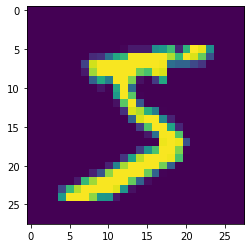

In [22]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0] )
plt.show()

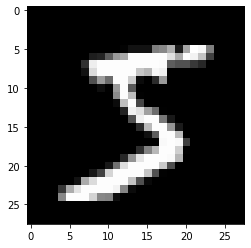

In [23]:
plt.imshow(train_images[0] , cmap="gray")
plt.show()

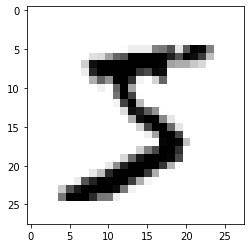

In [24]:
plt.imshow(train_images[0] , cmap="gray_r")
plt.show()

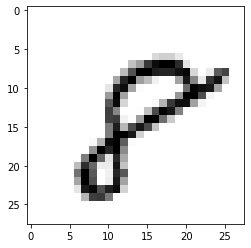

In [25]:
plt.imshow(train_images[59999] , cmap="gray_r")
plt.show()

preparing data

In [26]:
# 3D -- 4D Numpy array
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

# Normalization: /255
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images = train_images / 255
test_images = test_images / 255



In [27]:
train_images.shape,test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

creating network

In [28]:
input_shape = (28,28,1)

In [32]:
from  keras.models import Sequential
from  keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation="softmax"))


compiling model

In [35]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

fitting model

In [36]:
history = model.fit(x=train_images, y=train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2003 - accuracy: 0.9405
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0842 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0429 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0367 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0275 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0252 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0184 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - lo

evaluating models

In [37]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test loss:", test_loss)
print("Test accuracy", test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0582 - accuracy: 0.9849
Test loss: 0.058248523622751236
Test accuracy 0.9848999977111816


In [38]:
history_dict =  history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


loss and accuracy graph

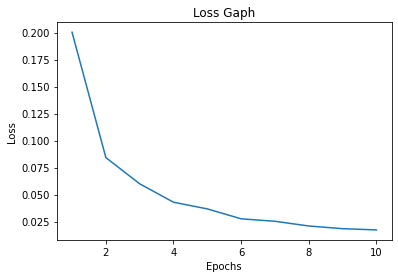

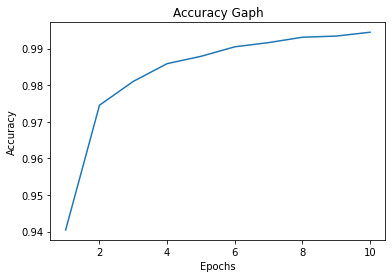

In [41]:
import matplotlib.pyplot as plt
epochs = range(1,11)
loss = history_dict["loss"]
accuracy = history_dict["accuracy"]

plt.title("Loss Gaph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, loss)
plt.show()

plt.title("Accuracy Gaph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs, accuracy)
plt.show()

saving model

In [42]:
model.save("mnist_model.h5")

loading model and predictions

In [ ]:
from keras.models import load_model
import numpy as np
model = load_model("./mnist_model.h5")

i = np.random.randint(10_000)

prediction = model.predict(test_images[i].reshape(1,28,28,1))
print(prediction)

print("Predicted Number",prediction.argmax())
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()


1/1 [==============================] - 0s 19ms/step
[[1.4767754e-09 2.0299447e-13 1.0660260e-15 1.0578066e-08 1.3744083e-15
  9.9999964e-01 1.0018262e-12 1.1326311e-12 2.8191351e-07 6.9268239e-08]]
Predicted Number 5


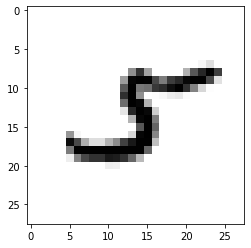

In [64]:
i = np.random.randint(10_000)

prediction = model.predict(test_images[i].reshape(1,28,28,1))
print(prediction)

print("Predicted Number",prediction.argmax())
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()
